In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, f1_score
sns.set()
np.random.seed(42)
print(tf.__version__)

2.0.0


In [2]:
# Load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# check shape of dataset
print("X Train shape {} and y Train shape {}".format(X_train.shape,y_train.shape))
print("X Test shape {} and y Test shape {}".format(X_test.shape,y_test.shape))

X Train shape (50000, 32, 32, 3) and y Train shape (50000, 1)
X Test shape (10000, 32, 32, 3) and y Test shape (10000, 1)


In [3]:
# scaling feature vector space
X_train = X_train/255
X_test = X_test/255

In [4]:
# falttening target label
y_train = y_train.flatten()
y_test = y_test.flatten()

# check shape of dataset
print("X Train shape {} and y Train shape {}".format(X_train.shape,y_train.shape))
print("X Test shape {} and y Test shape {}".format(X_test.shape,y_test.shape))

X Train shape (50000, 32, 32, 3) and y Train shape (50000,)
X Test shape (10000, 32, 32, 3) and y Test shape (10000,)


In [5]:
# check the number of target classes
n_out = len(set(y_train))
n_out

10

In [6]:
# input shape to the model
input_shape = X_train[0].shape
input_shape

(32, 32, 3)

In [7]:
# building convolution network for image classification using keras functional API

# input layer
i = Input(shape=input_shape)

# layer 1
x = Conv2D(32,(3,3), strides=2, activation='relu')(i)
x = BatchNormalization()(x)

# layer 2
x = Conv2D(32,(3,3), strides=2, activation='relu')(x)
x = BatchNormalization()(x)

# layer 3
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# layer 4
x = Conv2D(64,(3,3), strides=2, activation='relu')(i)
x = BatchNormalization()(x)

# layer 5
x = Conv2D(64,(3,3), strides=2, activation='relu')(x)
x = BatchNormalization()(x)

# layer 6
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# layer 7
x = Conv2D(128,(3,3), strides=2, activation='relu')(i)
x = BatchNormalization()(x)

# layer 8
x = Conv2D(128,(3,3), strides=2, activation='relu')(x)
x = BatchNormalization()(x)

# layer 9
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
# x = GlobalMaxPooling2D()(x)

# layer 10
x = Flatten()(x)
x = Dropout(0.2)(x)

# layer 11
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# output layer
x = Dense(n_out,activation='softmax')(x)

# final model
model = Model(i,x)

In [8]:
# Model summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       3584      
_________________________________________________________________
batch_normalization_4 (Batch (None, 15, 15, 128)       512       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0     

In [9]:
# compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
# data augmentation
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, 
                                                                 height_shift_range=0.1, horizontal_flip=True)

batch_size = 32
train_generator = data_generator.flow(X_train, y_train, batch_size)

# steps per epoch: 
# Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch
# this is needed as data generator can run indefinitely 
# need a mechanism by which we know that one epoch i.e. one pass of data is completed

steps_per_epoch = X_train.shape[0] // batch_size

In [12]:
hist = model.fit(train_generator, validation_data=(X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Train for 1562 steps, validate on 10000 samples
Epoch 1/50
1562/1562 [==============================] - 124s 79ms/step - loss: 1.6382 - accuracy: 0.4236 - val_loss: 1.4794 - val_accuracy: 0.4876
Epoch 2/50
1562/1562 [==============================] - 156s 100ms/step - loss: 1.3703 - accuracy: 0.5117 - val_loss: 1.3036 - val_accuracy: 0.5494
Epoch 3/50
1562/1562 [==============================] - 152s 97ms/step - loss: 1.2797 - accuracy: 0.5480 - val_loss: 1.2237 - val_accuracy: 0.5603
Epoch 4/50
1562/1562 [==============================] - 155s 99ms/step - loss: 1.2084 - accuracy: 0.5751 - val_loss: 1.0690 - val_accuracy: 0.6252
Epoch 5/50
1562/1562 [==============================] - 156s 100ms/step - loss: 1.1624 - accuracy: 0.5955 - val_loss: 1.0644 - val_accuracy: 0.6230
Epoch 6/50
1562/1562 [==============================] - 161s 103ms/step - loss: 1.1203 - accuracy: 0.6064 - val_loss: 1.0691 - val_accuracy: 0.6305
Epoch 7/50
1562/1562 [==============================] - 155s 99ms/s

In [13]:
# Check accuracy on test dataset
predict = model.predict(X_test).argmax(axis=1)
print('Test Accuracy {}'.format(accuracy_score(y_test,predict)))
print('Test F1 Score {}'.format(f1_score(y_test,predict,average='weighted'))) 

Test Accuracy 0.7603
Test F1 Score 0.7581581707408848


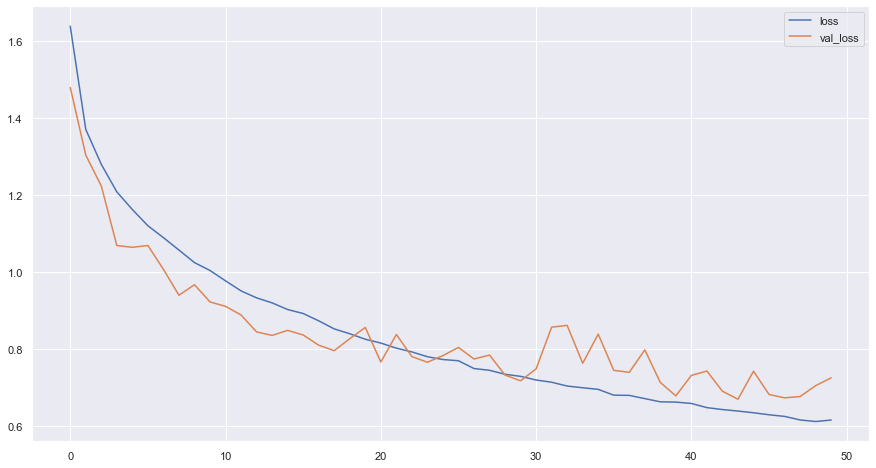

In [14]:
# plot loss 
plt.figure(figsize=(15,8))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

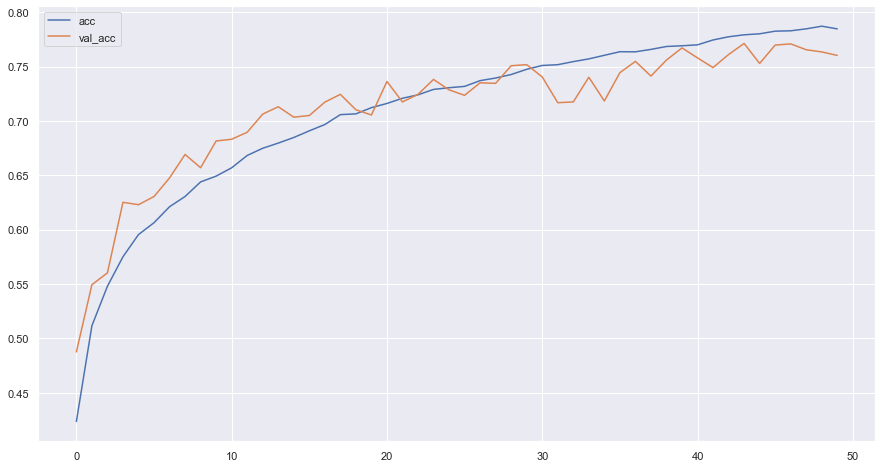

In [15]:
# Plot  accuracy 
plt.figure(figsize=(15,8))
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

In [16]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [17]:
label_mapping = {0 :'Airplane',
                 1 :'Automobile',
                 2 :'Bird',
                 3 :'Cat',
                 4 :'Deer',
                 5 :'Dog',
                 6 :'Frog',
                 7 :'Horse',
                 8 :'Ship',
                 9 :'Truck'}

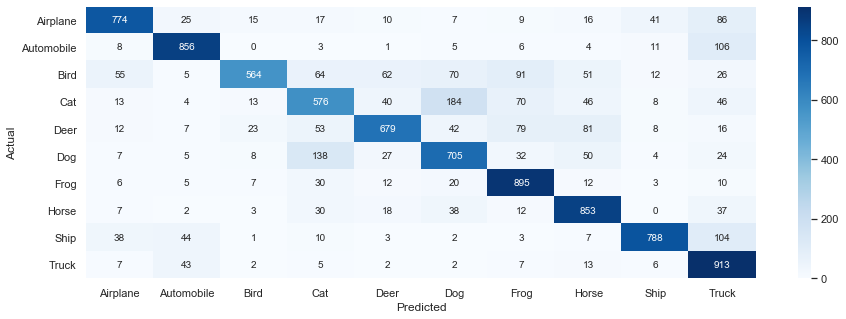

In [25]:
# confusion matrix
confusion = pd.DataFrame({'Actual':y_test,'Predicted':predict})

# map label to categories
confusion['Actual'] = confusion['Actual'].map(label_mapping)
confusion['Predicted'] = confusion['Predicted'].map(label_mapping)

# plot confusion matrix heat map
confusion_mat = confusion.groupby(['Actual','Predicted']).size().unstack(fill_value=0)
plt.figure(figsize=(15,5))
sns.heatmap(confusion_mat,annot=True,fmt='g',cmap='Blues')

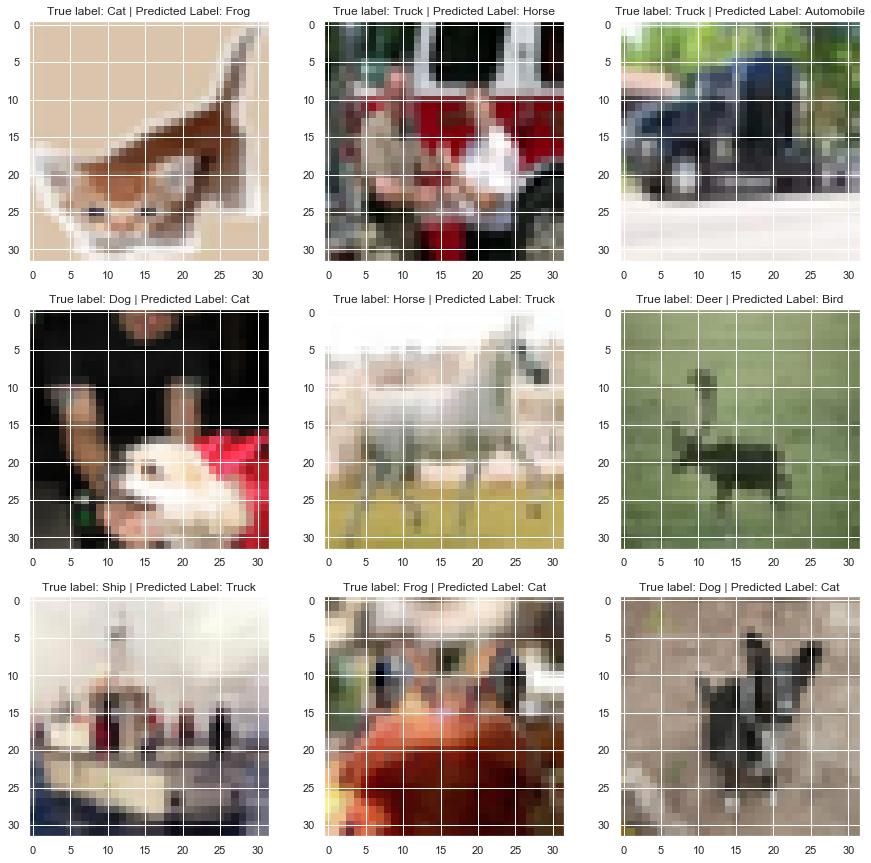

In [26]:
# index of Sample images where predictions are wrong
all_idx =  np.where(confusion['Actual'] != confusion['Predicted'])[0]
sample_idx = np.random.choice(all_idx,9)

# plot sample images
fig, axs = plt.subplots(3, 3,figsize=(15, 15))

# start idx
pos = 0
for row in range(3):
    for col in range(3):
        img_idx = sample_idx[pos]
        axs[row, col].imshow(X_test[img_idx])
        axs[row,col].set_title("True label: {} | Predicted Label: {}".format(confusion['Actual'][img_idx],
                                                                             confusion['Predicted'][img_idx])) 
        pos = pos + 1